### Google Earth Engine (GEE) for Building a Customized Landsat Dataset:

---

#### Pros:
1. **Massive Data Collection**: GEE has an extensive collection of satellite data, including Landsat, Sentinel, MODIS, and more, stored and ready for processing. This means you don't have to download or store large datasets yourself.

2. **Cloud-based Processing**: GEE processes data in the cloud, leveraging Google's infrastructure. This allows for rapid processing of large datasets without needing high-end local computing resources.

3. **Easy Access to Temporal Data**: You can easily access Landsat data across different dates, which facilitates temporal analysis.

4. **Seamless Integration with Google Drive**: Exporting results or datasets directly to Google Drive makes the data retrieval process efficient.

5. **API Integration**: The Python and JavaScript APIs are robust, allowing you to script your data processing and analysis tasks. 

6. **Built-in Algorithms**: GEE provides a multitude of pre-built algorithms for remote sensing analysis, which can save a lot of time.

7. **Community and Support**: GEE has a growing community, which means there are lots of tutorials, forums, and resources available. The platform is also actively maintained and updated by Google.

---

#### Cons:
1. **Learning Curve**: GEE has its scripting language, and while it's based on common languages like JavaScript (for the web platform) and Python (for the API), there's a learning curve associated with understanding the nuances of the platform.

2. **Processing Time Limitations**: For very extensive computations, you might hit the limits of what you can process at once. Some users report timeouts or restrictions on large jobs.

3. **Data Export Restrictions**: There are quotas on how much data you can export to Google Drive in a day.

4. **Dependency on Google Infrastructure**: Your workflow becomes dependent on Google's infrastructure. If there's any outage or if Google decides to change its policy or pricing, it could affect your workflow.

5. **Limited Customization**: While GEE offers many built-in algorithms, there might be cases where you need more customized solutions, and implementing them can be challenging.

6. **Potential Costs**: While GEE provides a generous free tier, very high usage levels or some specific functionalities might incur costs.

7. **Data Latency**: Sometimes, there's a delay in the availability of the latest satellite imagery on GEE compared to direct sources.

---


## Install and Initialize API
- pip install earthengine-api 
- Ensure you have set up the Google Earth Engine Python API on your machine.
- Follow the guide: https://developers.google.com/earth-engine/tutorials/community/intro-to-python-api

In [23]:
import ee 

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()


Successfully saved authorization token.


## Import Dataset for Rearching Images
- The dataset can be accessed using its unique ID from the Earth Engine Data Catalog.
- USGS Landsat 8 Level 2, Collection 2, Tier 1: https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C02_T1_L2#description
- More datasets: https://developers.google.com/earth-engine/datasets/catalog

In [10]:
# Load the Landsat 8 Level 2, Collection 2, Tier 1 dataset.
dataset = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')

In [ ]:
# Define the region of interest (e.g., a bounding box).
roi = ee.Geometry.Rectangle([-74.992000, 48.254000, -71.766000, 49.458000])

# Filter by date and region.
filtered_data = dataset.filterDate('2022-01-01', '2023-10-30').filterBounds(roi)

In [14]:
# Assuming values for WRS_PATH and WRS_ROW that you want to filter for:
desired_wrs_path = 15  # replace with your desired path value
desired_wrs_row = 26    # replace with your desired row value

filtered_data = (filtered_data
                 .filterMetadata('WRS_PATH', 'equals', desired_wrs_path)
                 .filterMetadata('WRS_ROW', 'equals', desired_wrs_row))

In [15]:
# Get the number of images in the filtered collection.
count = filtered_data.size().getInfo()
print(f"Number of results found: {count}")

# Convert the filtered collection to a list and get all of the images.
image_list = filtered_data.toList(count)

# Convert the filtered collection to a list and get all of the images.
image_list_info = image_list.getInfo()

# Extract properties for each image.
image_data = [(img['properties']['LANDSAT_PRODUCT_ID'], 
              img['properties']['WRS_PATH'], 
              img['properties']['WRS_ROW']) for img in image_list_info]

# Print the properties.
for product_id, path, row in image_data:
    print(f"LANDSAT_PRODUCT_ID: {product_id}, WRS_PATH: {path}, WRS_ROW: {row}")


Number of results found: 27
LANDSAT_PRODUCT_ID: LC08_L2SP_015026_20220108_20220114_02_T1, WRS_PATH: 15, WRS_ROW: 26
LANDSAT_PRODUCT_ID: LC08_L2SP_015026_20220124_20220128_02_T1, WRS_PATH: 15, WRS_ROW: 26
LANDSAT_PRODUCT_ID: LC08_L2SP_015026_20220209_20220222_02_T1, WRS_PATH: 15, WRS_ROW: 26
LANDSAT_PRODUCT_ID: LC08_L2SP_015026_20220225_20220308_02_T1, WRS_PATH: 15, WRS_ROW: 26
LANDSAT_PRODUCT_ID: LC08_L2SP_015026_20220313_20220322_02_T1, WRS_PATH: 15, WRS_ROW: 26
LANDSAT_PRODUCT_ID: LC08_L2SP_015026_20220430_20220504_02_T1, WRS_PATH: 15, WRS_ROW: 26
LANDSAT_PRODUCT_ID: LC08_L2SP_015026_20220601_20220609_02_T1, WRS_PATH: 15, WRS_ROW: 26
LANDSAT_PRODUCT_ID: LC08_L2SP_015026_20220617_20220629_02_T1, WRS_PATH: 15, WRS_ROW: 26
LANDSAT_PRODUCT_ID: LC08_L2SP_015026_20220703_20220707_02_T1, WRS_PATH: 15, WRS_ROW: 26
LANDSAT_PRODUCT_ID: LC08_L2SP_015026_20220719_20220725_02_T1, WRS_PATH: 15, WRS_ROW: 26
LANDSAT_PRODUCT_ID: LC08_L2SP_015026_20220804_20220817_02_T1, WRS_PATH: 15, WRS_ROW: 26
LAND

In [7]:
num_images_to_display = 3

for i in range(min(num_images_to_display, len(image_list_info))):
    image = image_list_info[i]
    properties = image['properties']
    print(f"Properties for Image {i+1} (ID: {image['id']}):")
    for key, value in properties.items():
        print(f"{key}: {value}")
    print("\n")

Properties for Image 1 (ID: LANDSAT/LC08/C02/T1_L2/LC08_013026_20210107):
DATA_SOURCE_ELEVATION: GLS2000
WRS_TYPE: 2
REFLECTANCE_ADD_BAND_1: -0.2
REFLECTANCE_ADD_BAND_2: -0.2
DATUM: WGS84
REFLECTANCE_ADD_BAND_3: -0.2
REFLECTANCE_ADD_BAND_4: -0.2
REFLECTANCE_ADD_BAND_5: -0.2
REFLECTANCE_ADD_BAND_6: -0.2
REFLECTANCE_ADD_BAND_7: -0.2
system:footprint: {'type': 'LinearRing', 'coordinates': [[-69.41972391606144, 47.79152675554949], [-69.41785043015115, 47.791533605798406], [-69.39182336984956, 47.85337658861158], [-69.3089532705773, 48.04995710898797], [-69.25313288462036, 48.18197008166039], [-69.18978916219892, 48.331044859368156], [-69.13650372586936, 48.45583023924128], [-69.09158697146792, 48.560609484870646], [-69.0489690549707, 48.65968422488399], [-69.00457289364597, 48.76251962931117], [-68.90617687267859, 48.989176166152504], [-68.70108517631891, 49.455976095456776], [-68.6867078258299, 49.48988571866086], [-68.70748084490106, 49.49381084986812], [-71.09765322883561, 49.9134192823

## Exporting Search Result to Google Drive

In [34]:
# Select the first image from the filtered_data collection.
single_image = filtered_data.first()
# Select the bands B2, B3, and B4 from the single_image and cast them to UInt16.
single_image_selected = single_image.select(['SR_B2', 'SR_B3', 'SR_B4']).toUint16()
print(single_image_selected.getInfo())

# Define export parameters.
task_config = {
    'image': single_image_selected,
    'description': 'Landsat8_single_image',
    'scale': 30,  # Landsat resolution
    'folder': 'LandSat_Data_15_26',
    'fileFormat': 'GeoTIFF'
}

# Start the export task.
task = ee.batch.Export.image.toDrive(**task_config)
task.start()

{'type': 'Image', 'bands': [{'id': 'SR_B2', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7771, 7871], 'crs': 'EPSG:32618', 'crs_transform': [30, 0, 503085, 0, -30, 5531415]}, {'id': 'SR_B3', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7771, 7871], 'crs': 'EPSG:32618', 'crs_transform': [30, 0, 503085, 0, -30, 5531415]}, {'id': 'SR_B4', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7771, 7871], 'crs': 'EPSG:32618', 'crs_transform': [30, 0, 503085, 0, -30, 5531415]}], 'id': 'LANDSAT/LC08/C02/T1_L2/LC08_015026_20220108', 'version': 1642292198895973, 'properties': {'DATA_SOURCE_ELEVATION': 'GLS2000', 'WRS_TYPE': 2, 'REFLECTANCE_ADD_BAND_1': -0.2, 'REFLECTANCE_ADD_BAND_2': -0.2, 'DATUM': 'WGS84', 'REFLECTANCE_ADD_BAND_3': -0.2, 'REFLECTANCE_ADD_BAND_4': -0.2, 'REFLECTANCE_ADD_BAND_5': -0.2, 'REFLECTANCE_ADD_BAND_6': -0.2, 'REFLECTANCE_ADD_BAND_

- Task Manager to monitor task status and errors: https://code.earthengine.google.com/tasks

In [35]:
import time

while task.status()['state'] in ['READY', 'RUNNING']:
    print(task.status())
    time.sleep(10)
print('Task completed')

{'state': 'READY', 'description': 'Landsat8_single_image', 'creation_timestamp_ms': 1698776905869, 'update_timestamp_ms': 1698776905869, 'start_timestamp_ms': 0, 'task_type': 'EXPORT_IMAGE', 'id': 'DAHP2YFP6P2QV2KGM2ZC5XZH', 'name': 'projects/earthengine-legacy/operations/DAHP2YFP6P2QV2KGM2ZC5XZH'}
{'state': 'RUNNING', 'description': 'Landsat8_single_image', 'creation_timestamp_ms': 1698776905869, 'update_timestamp_ms': 1698776920054, 'start_timestamp_ms': 1698776920018, 'task_type': 'EXPORT_IMAGE', 'attempt': 1, 'id': 'DAHP2YFP6P2QV2KGM2ZC5XZH', 'name': 'projects/earthengine-legacy/operations/DAHP2YFP6P2QV2KGM2ZC5XZH'}
{'state': 'RUNNING', 'description': 'Landsat8_single_image', 'creation_timestamp_ms': 1698776905869, 'update_timestamp_ms': 1698776922535, 'start_timestamp_ms': 1698776920018, 'task_type': 'EXPORT_IMAGE', 'attempt': 1, 'id': 'DAHP2YFP6P2QV2KGM2ZC5XZH', 'name': 'projects/earthengine-legacy/operations/DAHP2YFP6P2QV2KGM2ZC5XZH'}
{'state': 'RUNNING', 'description': 'Landsat

## Validate Exported Images

Number of bands: 3
Band descriptions: ('SR_B2', 'SR_B3', 'SR_B4')


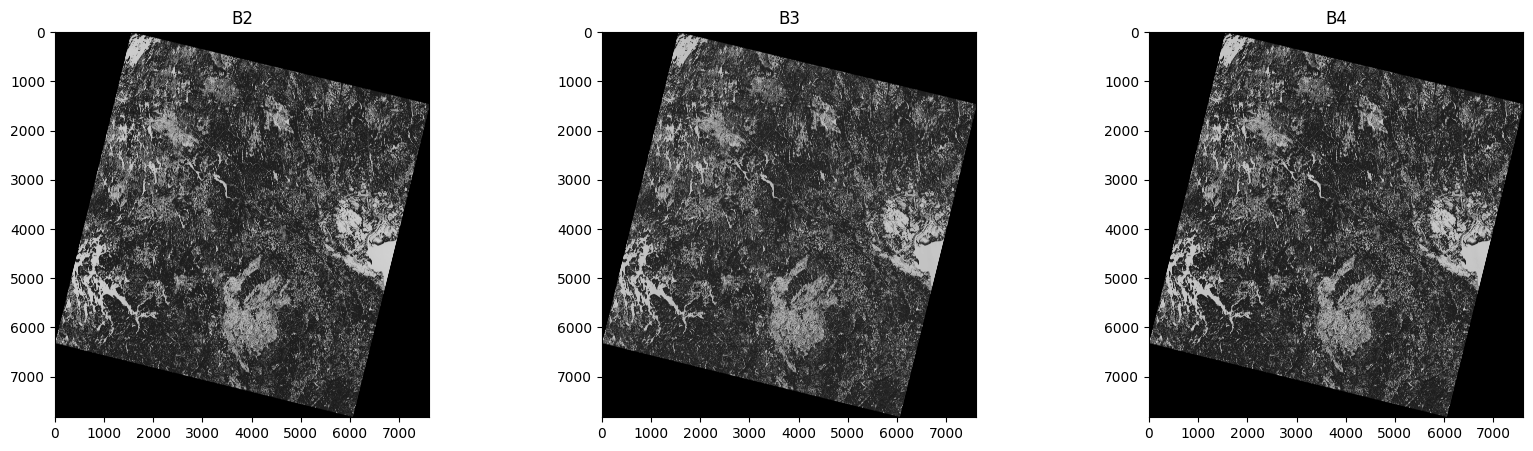

In [37]:
import rasterio
import matplotlib.pyplot as plt

# Open the GeoTIFF file
with rasterio.open('Earth Engine Output/Landsat8_single_image.tif') as src:
    # Read the bands into separate variables
    b2, b3, b4 = src.read(1), src.read(2), src.read(3)
    
    # Print some metadata about the bands
    print(f"Number of bands: {src.count}")
    print(f"Band descriptions: {src.descriptions}")
    
    # Plot the bands
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
    
    ax1.imshow(b2, cmap='gray')
    ax1.set_title('B2')
    
    ax2.imshow(b3, cmap='gray')
    ax2.set_title('B3')
    
    ax3.imshow(b4, cmap='gray')
    ax3.set_title('B4')
    
    plt.show()

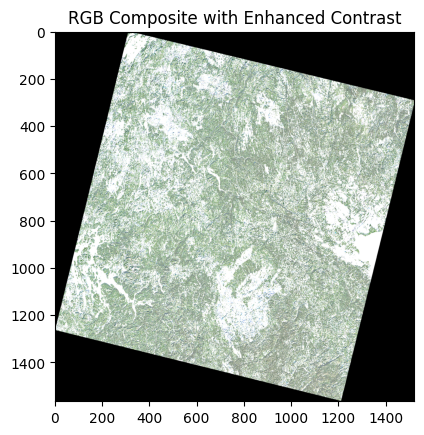

In [46]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Open the GeoTIFF file
with rasterio.open('Earth Engine Output/Landsat8_single_image.tif') as src:
    
    # Determine the dimensions of the downscaled image
    scale_factor = 0.2
    new_width = int(src.width * scale_factor)
    new_height = int(src.height * scale_factor)
    
    # Read the bands into an array with downsampled resolution
    RGB = src.read([3, 2, 1], out_shape=(3, new_height, new_width))
    RGB = RGB.astype(np.float32) / 65535  # Normalize to [0, 1] range
    
    # Clip and scale for enhanced contrast
    RGB_for_display = np.clip(RGB, 0, 0.2) / 0.2
    RGB_for_display = np.array(RGB_for_display, dtype=np.float32)

    # Plot the RGB composite with enhanced contrast
    plt.imshow(RGB_for_display.transpose(1, 2, 0))
    plt.title('RGB Composite with Enhanced Contrast')
    plt.show()